<a href="https://colab.research.google.com/github/alelorca1977/AnalisisVuelos/blob/main/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de vuelos y modelamiento predictivo de retrasos

Autor: Alejandro Lorca

### Resumen:


1.   Carga del dataset
2.   Análisis exploratorio
3.   Limpieza y Preprocesamiento
  *   Tratamiento de NA
  *   Datos atípicos
  *   Outliers
  *   Generación de variables nuevas
  *   Normalización de variables numéricas
  *   Transformación de variables categóricas
4.   Generación del modelo predictivo
  *   Selección de atributos
  *   Entrenamiento y test
  *   Validación del modelo (AUC y confusion matrix)
5.   Preguntas y Conclusiones






# Carga de dataset

In [4]:
#Cargamos el dataset
import pandas as pd
df = pd.read_csv("dataset_SCL.csv")
df.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
5,2017-01-06 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 00:04:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
6,2017-01-07 23:30:00,226,SCEL,KMIA,AAL,2017-01-07 23:25:00,226,SCEL,KMIA,AAL,7,1,2017,Sabado,I,American Airlines,Santiago,Miami
7,2017-01-08 23:30:00,226,SCEL,KMIA,AAL,2017-01-08 23:25:00,226,SCEL,KMIA,AAL,8,1,2017,Domingo,I,American Airlines,Santiago,Miami
8,2017-01-09 23:30:00,226,SCEL,KMIA,AAL,2017-01-10 00:10:00,226,SCEL,KMIA,AAL,10,1,2017,Martes,I,American Airlines,Santiago,Miami
9,2017-01-11 23:30:00,226,SCEL,KMIA,AAL,2017-01-12 00:39:00,226,SCEL,KMIA,AAL,12,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [5]:
#Nombres de Columnas
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

In [6]:
#Revisamos valores nulos
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


**Se puede ver un valor nulo en la columna "Vlo-O" puesto que la cantidad de NO-NULOS es de 68205**

In [7]:
#buscamos el valor nulo, utilizamos la negación de la función notna()
from pandas.core.dtypes.missing import notna
import numpy as np
valor_nulo = df[(np.logical_not(df['Vlo-O'].notna()))]
valor_nulo

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [ ]:
#buscamos otro vuelo donde el origen sea "SCEL" y destino "SPJC"
#para determinar qué valor debemos imputar
vuelo_SCEL = df[(df['Vlo-I']=='200') & (df['Ori-I']=='SCEL') & (df['Des-I']=='SPJC')]
vuelo_SCEL.head(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6058,2017-01-01 11:00:00,200,SCEL,SPJC,LAW,2017-01-01 11:07:00,200,SCEL,SPJC,48O,1,1,2017,Domingo,I,Latin American Wings,Santiago,Lima
6059,2017-01-03 11:00:00,200,SCEL,SPJC,LAW,2017-01-03 11:23:00,200,SCEL,SPJC,48O,3,1,2017,Martes,I,Latin American Wings,Santiago,Lima
6060,2017-01-08 11:00:00,200,SCEL,SPJC,LAW,2017-01-08 11:46:00,200,SCEL,SPJC,48O,8,1,2017,Domingo,I,Latin American Wings,Santiago,Lima
6061,2017-01-09 11:00:00,200,SCEL,SPJC,LAW,2017-01-09 11:08:00,200,SCEL,SPJC,48O,9,1,2017,Lunes,I,Latin American Wings,Santiago,Lima
6062,2017-01-11 11:00:00,200,SCEL,SPJC,LAW,2017-01-11 11:10:00,200,SCEL,SPJC,48O,11,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima
6063,2017-01-12 11:00:00,200,SCEL,SPJC,LAW,2017-01-12 11:00:00,200,SCEL,SPJC,48O,12,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
6064,2017-01-13 11:00:00,200,SCEL,SPJC,LAW,2017-01-13 11:00:00,200,SCEL,SPJC,48O,13,1,2017,Viernes,I,Latin American Wings,Santiago,Lima
6065,2017-01-15 11:00:00,200,SCEL,SPJC,LAW,2017-01-15 11:00:00,200,SCEL,SPJC,48O,15,1,2017,Domingo,I,Latin American Wings,Santiago,Lima
6066,2017-01-16 11:00:00,200,SCEL,SPJC,LAW,2017-01-16 11:09:00,200,SCEL,SPJC,48O,16,1,2017,Lunes,I,Latin American Wings,Santiago,Lima
6067,2017-01-18 11:00:00,200,SCEL,SPJC,LAW,2017-01-18 11:06:00,200,SCEL,SPJC,56R,18,1,2017,Miercoles,I,Latin American Wings,Santiago,Lima


**Podemos notar que el valor faltante se repite en vuelos parecidos, por lo tanto imputaremos el valor "200" en la fila donde identificamos el valor faltante:**

In [10]:
#imputamos el valor "200" en la columna "Vlo-O" donde tiene valor nulo
#seteamos limite 1 para asegurarnos que solo va a reemplazar una fila
df['Vlo-O'].fillna('200', limit = 1, inplace = True)
#Revisamos valores nulos
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68206 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: null_counts is deprecated. Use show_counts instead
  """


Ahora vemos que el dataset no tiene valores null

## Visualizando algunos datos:

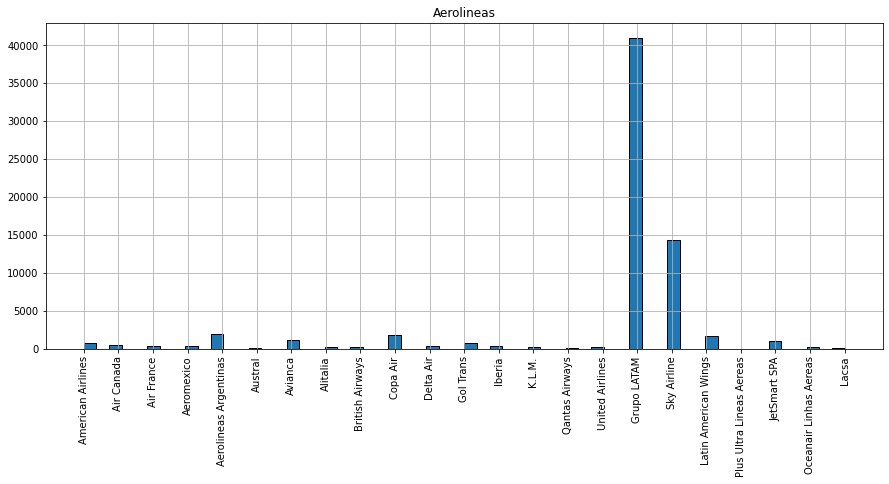

<Figure size 432x288 with 0 Axes>

In [11]:
#Graficamos la cantidad de vuelos por cada aerolínea
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.title('Aerolineas')
plt.hist(df['OPERA'], bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
plt.clf()

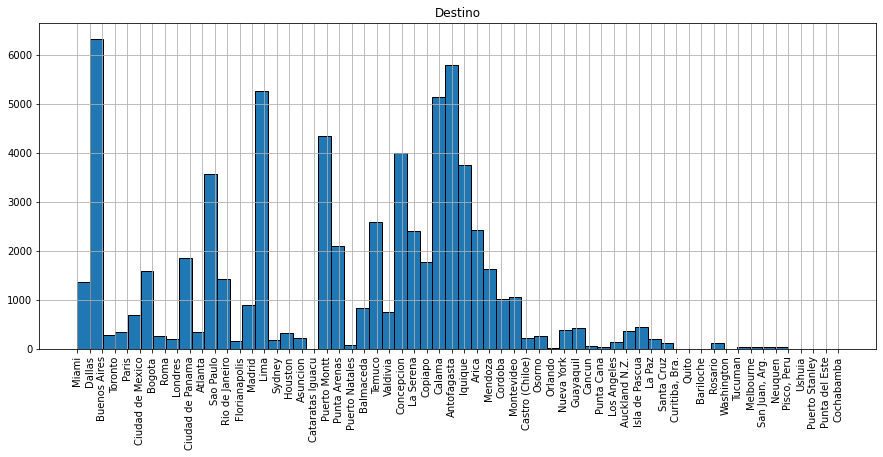

<Figure size 432x288 with 0 Axes>

In [12]:
#Graficamos la cantidad de vuelos por cada destino
plt.figure(figsize=(15,6))
plt.title('Destino')
plt.hist(df['SIGLADES'], bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
plt.clf()

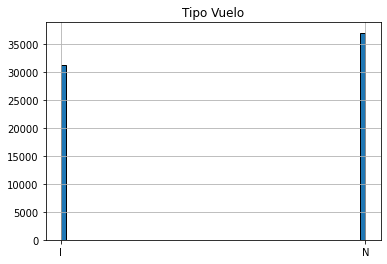

<Figure size 432x288 with 0 Axes>

In [13]:
#Graficamos los tipos de vuelos (I: internacional, N: nacional)
plt.title('Tipo Vuelo')
plt.hist(df['TIPOVUELO'], bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

In [14]:
#separamos vuelos nacionales e internacionales
df_nac = df[(df['TIPOVUELO']=='N')]
df_int = df[(df['TIPOVUELO']=='I')]

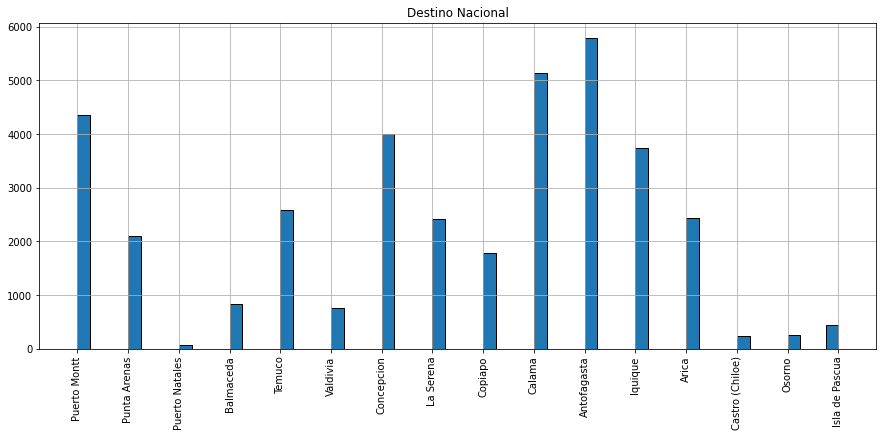

<Figure size 432x288 with 0 Axes>

In [16]:
#Graficamos la cantidad de vuelos por cada destino NACIONAL
plt.figure(figsize=(15,6))
plt.title('Destino Nacional')
plt.hist(df_nac['SIGLADES'], bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
plt.clf()

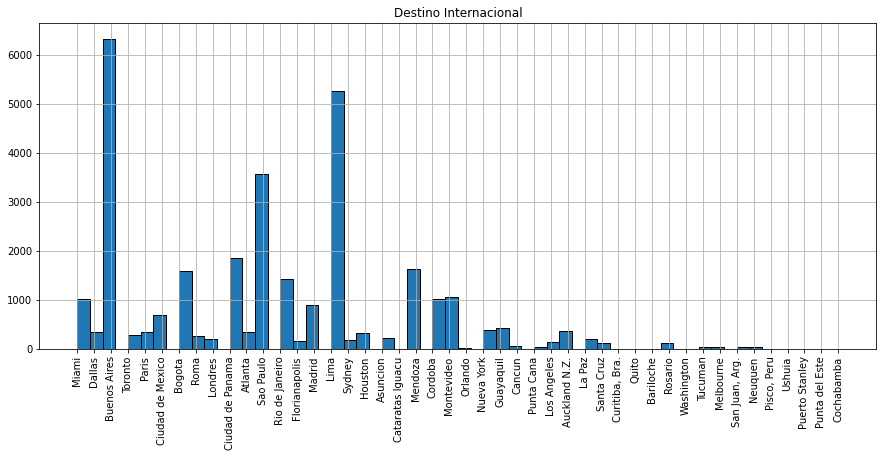

<Figure size 432x288 with 0 Axes>

In [17]:
#Graficamos la cantidad de vuelos por cada destino INTERNACIONAL
plt.figure(figsize=(15,6))
plt.title('Destino Internacional')
plt.hist(df_int['SIGLADES'], bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
plt.clf()

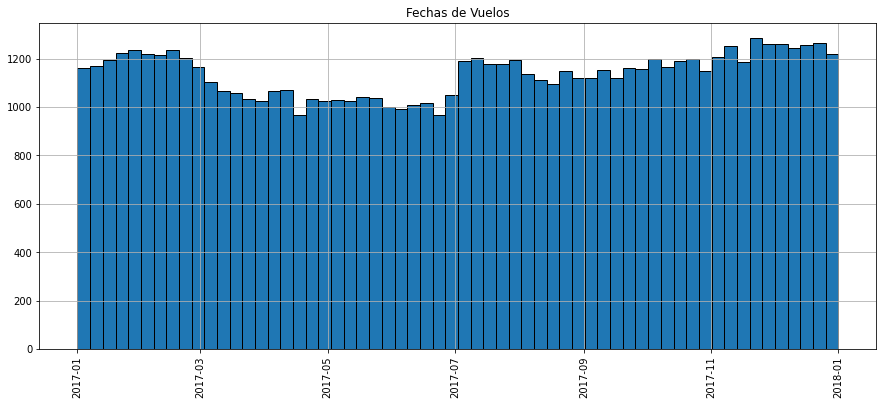

<Figure size 432x288 with 0 Axes>

In [18]:
#Graficamos la cantidad de vuelos por fecha
plt.figure(figsize=(15,6))
plt.title('Fechas de Vuelos')
plt.hist(pd.to_datetime(df['Fecha-I']), bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.xticks(rotation=90)
plt.show()
plt.clf()

In [19]:
#creamos una nueva columna: HORA
from datetime import datetime
df['Hora-I'] = df['Fecha-I'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d %H:%M:%S")).dt.hour
df.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora-I
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami,23
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami,23
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami,23
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami,23
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami,23


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


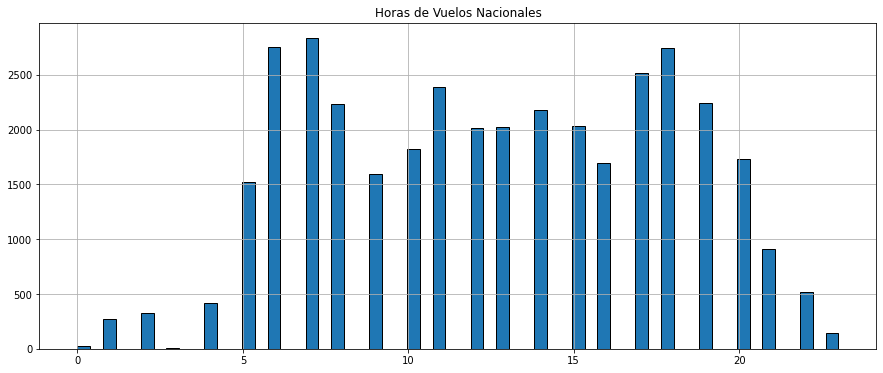

<Figure size 432x288 with 0 Axes>

In [21]:
#Graficamos la cantidad de vuelos Nacionales por hora
df_nac['Hora-I'] = df['Fecha-I'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d %H:%M:%S")).dt.hour
plt.figure(figsize=(15,6))
plt.title('Horas de Vuelos Nacionales')
plt.hist(df_nac['Hora-I'], bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


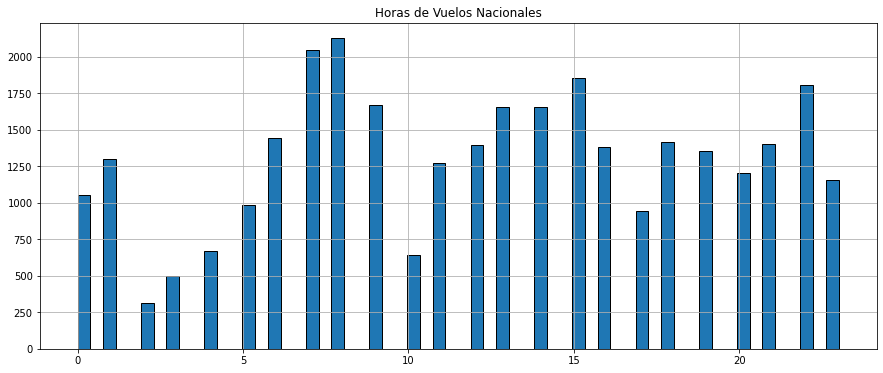

<Figure size 432x288 with 0 Axes>

In [22]:
#Graficamos la cantidad de vuelos Internacionales por hora
df_int['Hora-I'] = df['Fecha-I'].apply(lambda _: datetime.strptime(_,"%Y-%m-%d %H:%M:%S")).dt.hour
plt.figure(figsize=(15,6))
plt.title('Horas de Vuelos Nacionales')
plt.hist(df_int['Hora-I'], bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

# Generación de nuevas columnas

In [77]:
import datetime
#type(df['Fecha-I'])
df['dif_min'] = (pd.to_datetime(df['Fecha-O']) - pd.to_datetime(df['Fecha-I']))
#type(df['dif_min'])
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Hora-I,Fecha-vuelo,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Domingo,I,American Airlines,Santiago,Miami,23,2017-01-01,0 days 00:03:00
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Lunes,I,American Airlines,Santiago,Miami,23,2017-01-01,0 days 00:09:00
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,1,2017,Martes,I,American Airlines,Santiago,Miami,23,2017-01-01,0 days 00:09:00
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,1,2017,Miercoles,I,American Airlines,Santiago,Miami,23,2017-01-01,0 days 00:03:00
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,2017,Jueves,I,American Airlines,Santiago,Miami,23,2017-01-01,-1 days +23:58:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,14,2017-01-01,0 days 00:46:00
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima,14,2017-01-01,0 days 00:16:00
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,14,2017-01-01,0 days 00:40:00
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima,14,2017-01-01,0 days 00:13:00


In [51]:
#Creamos nuevas columnas:
#Fecha-vuelo
#temporada_alta
#dif_min
#atraso_15
#periodo_dia

from datetime import datetime

for i in range(len(df)):
  df['Fecha-vuelo'] = datetime.strptime((str(df.loc[i,'Fecha-I'])[:10]), '%Y-%m-%d')
  if((pd.to_datetime(df['Fecha-vuelo']) > pd.to_datetime('2017-03-04') & 
      pd.to_datetime(df['Fecha-vuelo']) < pd.to_datetime('2017-07-15')) |
     (pd.to_datetime(df['Fecha-vuelo']) > pd.to_datetime('2017-07-31') &
      pd.to_datetime(df['Fecha-vuelo']) < pd.to_datetime('2017-09-11')) |
     (pd.to_datetime(df['Fecha-vuelo']) > pd.to_datetime('2017-09-30') & 
      pd.to_datetime(df['Fecha-vuelo']) < pd.to_datetime('2017-12-15'))):
    df['temporada_alta'] = 0
  else:
    df['temporada_alta'] = 1
  
  if(df['dif_min'] > 15):
    df['atraso_15'] = 1
  else:
    df['atraso_15'] = 0


TypeError: ignored

In [47]:
type(df['Fecha-vuelo'])

pandas.core.series.Series